<a href="https://colab.research.google.com/github/Vidarr22/BML-LCA-2-3-./blob/main/Exp_7(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 7: Build the K-Nearest Neighbours model on suitable dataset.


Dataset Used: Iris Dataset

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Accuracy: 1.0

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1

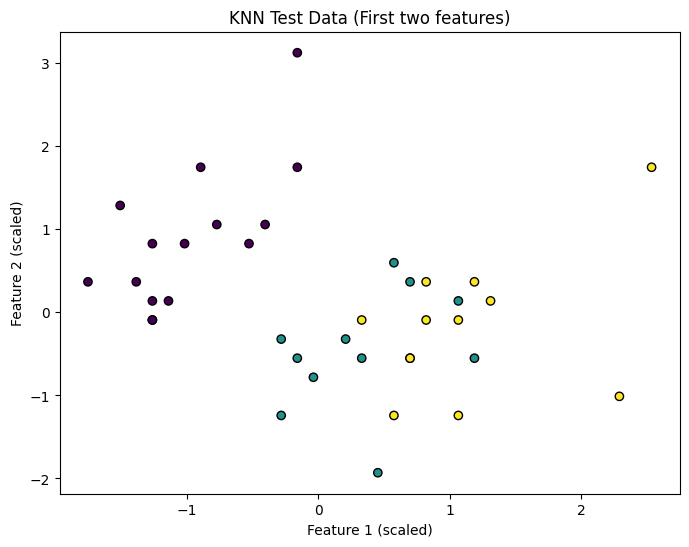

In [1]:
# K-Nearest Neighbours Model - iris Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

# Encode class names for readability
df['class'] = df['class'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df.head())

# Feature Selection

X = df.iloc[:, :-1]     # all feature columns
y = df.iloc[:, -1]      # target column

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN model

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Decision Boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=pd.Categorical(y_test).codes, edgecolor="k")
plt.title("KNN Test Data (First two features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


Manual Implementation

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Manual Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Manual KNN Prediction

def predict_knn(X_train, y_train, x_test, k=5):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]

    k_idx = np.argsort(distances)[:k]
    k_labels = y_train[k_idx]
    most_common = Counter(k_labels).most_common(1)
    return most_common[0][0]

# Predict
predictions = []
for x in X_test:
    predictions.append(predict_knn(X_train, y_train, x, k=5))

predictions = np.array(predictions)

# Accuracy
accuracy = np.mean(predictions == y_test)
print("Manual KNN Accuracy:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(pd.crosstab(y_test, predictions,
                  rownames=['Actual'], colnames=['Predicted']))


Manual KNN Accuracy: 1.0

Confusion Matrix:
Predicted   0   1   2
Actual               
0          15   0   0
1           0  11   0
2           0   0  12


Built-In

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

